# Iris classification

If you do not have the file of data set, you can import it from sklearn as follows:
But remember that the data set is in numpy array format and to work with you need to convert it to the DataFrame.

In [7]:
# from sklearn.datasets import load_iris
# iris_X, iris_y = load_iris(return_X_y=True)
# datask = pd.DataFrame(iris_X,columns=['sepal-length','sepal-width','petal-length','petal-width'])
# datask['class'] = iris_y
# datask.head()

In [8]:
import numpy as np
import pandas as pd

In [9]:
# call a data set from csv file on the same folder.
Iris = pd.read_csv('Iris.csv')

In [4]:
# This function previews the first N rows of your DataFrame
# By default, it shows you the top 5 rows of data in the DataFrame
Iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# This function returns the last n rows. By default, bottom 5 rows of data in the DataFrame.
Iris.tail()

,sepal-length,sepal-width,petal-length,petal-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
# generate descriptive statistics that summarize the central tendency,
# dispersion and shape of a dataset’s distribution, excluding NaN values
Iris.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# Show the columns' name of DataFrame
Iris.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'], dtype='object')

In [13]:
# Find if there is any missing values in the dataset.
null = Iris.isnull().sum()
print(null)

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64


In [14]:
# Find how many unique values is in the class column.
Iris['class'].nunique()

3

In [15]:
# How many number each unique values has.
Iris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [16]:
# Find what type of data is
Iris.dtypes

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
class            object
dtype: object

## Visualization

#### Box (Whisker) plot

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

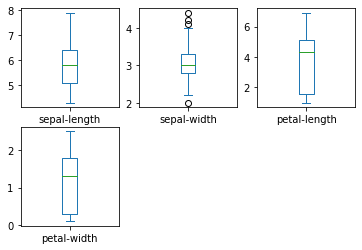

In [71]:
# box and whisker plots
Iris.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.show()

As the class column has categorical inputs, in above plot there are just four panels. To plot the fifth panel, we have to convert the data of class column to numeric values as follows:

In [18]:
Iris['class']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [19]:
Iris['class']=pd.Categorical(Iris['class'])
Iris['class']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: category
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [20]:
Iris['class'] = Iris['class'].cat.codes
Iris['class']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int8

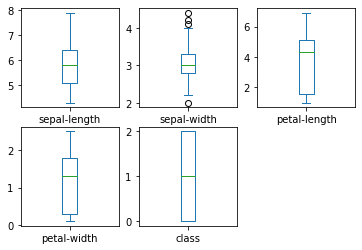

In [21]:
Iris.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.show()

#### Distribution plot

A histogram is a representation of the distribution of data.

array([[<AxesSubplot:title={'center':'sepal-length'}>,
        <AxesSubplot:title={'center':'sepal-width'}>],
       [<AxesSubplot:title={'center':'petal-length'}>,
        <AxesSubplot:title={'center':'petal-width'}>],
       [<AxesSubplot:title={'center':'class'}>, <AxesSubplot:>]],
      dtype=object)

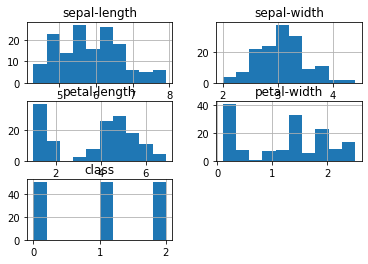

In [22]:
Iris.hist()

#### Pair plots using Scatter matrix

Checking for **collinearity** among attributes of a dataset, is one of the most important steps in data preprocessing. A good way to understand the **correlation** among the features, is to create scatter plots for each pair of attributes.


### <span style='color:purple'>Pandas</span>:

- scatter_matrix():

It can be used to easily generate a group of scatter plots between all pairs of numerical features. It creates a plot for each numerical feature against every other numerical feature and also a histogram for each of them.

<function matplotlib.pyplot.show(close=None, block=None)>

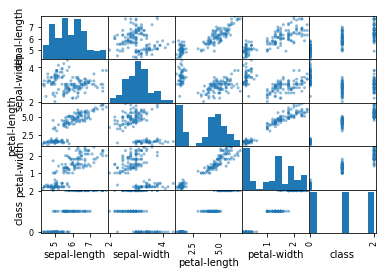

In [88]:
scatter_matrix(Iris)
plt.show

#### Developed scatter plot

In the following, we plot scatter plots from the data and add more features to the plots. For example, different classes is now seperated by different colors.

In [23]:
def s_plot(x1, x2, l1, l2, x1min, x1max, x2min, x2max):
    plt.clf()
    plt.scatter(x1, x2, c = y, cmap = plt.cm.Set1, edgecolor = 'k')
    plt.xlabel(l1)
    plt.ylabel(l2)
    plt.xlim(x1min, x1max)
    plt.ylim(x2min, x2max)
    plt.xticks(())
    plt.yticks(())

In [25]:
array = Iris.values
X = array[:,0:4]
y = array[:,4]

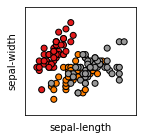

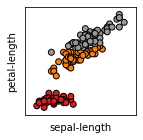

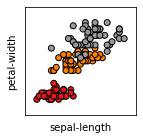

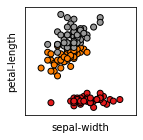

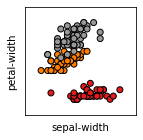

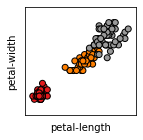

In [26]:
s = 0
for i in range(0,3):
    for j in range(i+1,4):
        s+=1 
        #plt.subplot(3,2,s)
        plt.figure(s, figsize = (2, 2))
        s_plot(X[:,i], X[:,j], Iris.columns[i] , Iris.columns[j], X[:,i].min()-0.5 , X[:,i].max() +0.5, X[:,j].min()-0.5 , X[:,j].max()+0.5)

# Learn the data

In the following, we are going to learn the data through different ML lgorithms:

1) Decision tree classifier

2) Logistic regression

3) Random forest.

### 1) DecisionTreeClassifier

In [91]:
# to randolmly splitt data
from sklearn.model_selection import train_test_split
train, test = train_test_split(Iris, test_size = 0.3, stratify = data['class'], random_state = 42)

In [92]:
X_train = train[['sepal-length','sepal-width','petal-length','petal-width']]
y_train = train['class']
X_test = test[['sepal-length','sepal-width','petal-length','petal-width']]
y_test = test['class']

In [93]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# metrics: to find accuracy, i.e., difference between actual and predicted value of target
from sklearn import metrics

In [95]:
model = DecisionTreeClassifier(max_depth = 3, random_state = 1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# metrics.accuracy_score 
accuracy = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(accuracy))

The accuracy of the Decision Tree is 0.933


In [96]:
# Decision tree classifier has a properties called maximum leaf.
#  It can be changed from 1 to higher value.
# There is no fashion that increasing the number of leaf gives rise in better results.
# Through the following code, we want to find what number is the optimum choice.

ACC_train = []
ACC_test = []
leaf = list(range(1,41))

for i in leaf:
    model = DecisionTreeClassifier(max_depth = i, random_state = 1)
    model.fit(X_train,y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    accuracy_train = metrics.accuracy_score(y_pred_train,y_train)
    accuracy_test = metrics.accuracy_score(y_pred_test,y_test)
    ACC_train.append(accuracy_train)
    ACC_test.append(accuracy_test)
    
print(ACC_train)
print(ACC_test)

[0.6666666666666666, 0.9714285714285714, 0.9809523809523809, 0.9904761904761905, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.6666666666666666, 0.8888888888888888, 0.9333333333333333, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777

# exercise

#### Plot the above accuracy in terms of number of leafs
#### Change the answer list which is a python list to the pandas DataFrame where the columns are the number of leafs, accuracy of train and accuracy of test.

# Logistic Regression

Logistic regression is a linear method.

C is the inverse of regularization parameter. i.e. smaller: stronger regularization then zero means strong regularization. default of the model is 1.

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

mdl = LogisticRegression(random_state = 0, C = 0.5, class_weight = 'balanced', solver = 'liblinear', max_iter = 100)
mdl.fit(X_train, y_train)
prediction_tr = mdl.predict(X_train)
prediction_tt = mdl.predict(X_test)
accuracy_tr = metrics.accuracy_score(prediction_tr,y_train)
accuracy_tt = metrics.accuracy_score(prediction_tt,y_test)

print(accuracy_tr)
print(accuracy_tt)

0.9619047619047619
0.8888888888888888


# exercise
#### Do the above code with nonlinear regularizaion. In order to do that, we have to manipulate features. Add more columns to the dataframe through features^2, features1*features2 and ... .

# Random Forest

As decision tree model tend to overfit fast. Thus, we use randomly many decision trees and at the end the results come from all of them. It has been called random forest.

Classifier gives the probability or 0/1 depends on what we ask.
Regression gives the mean value.

In [57]:
from sklearn.ensemble import RandomForestClassifier

# number of estimators shows how many trees considered in random forest.

mdl = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = 1, min_samples_split = 2, max_features = 2)
mdl.fit(X_train, y_train)
#                                                                                             prdict(X[],;:+p
;:??
    \redict(X_test)
accuracy_tr = metrics.accuracy_score(prediction_tr,y_train)
accuracy_tt = metrics.accuracy_score(prediction_tt,y_test)

print(accuracy_tr)
print(accuracy_tt)

1.0
0.9111111111111111


# Hyperparameter tunning

#### how to optimize the parameters of each model, e.g., maximum depth and ...

In [59]:
from sklearn.model_selection import GridSearchCV
#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
parameters = [{'n_estimators': [50,100,150,200], 'max_depth': [5,10,15,20],'min_samples_split': [1,2,3,4]}]
clf = GridSearchCV(RandomForestClassifier(), parameters)
clf.fit(X_train, y_train)
sorted(clf.cv_results_.keys())

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_min_samples_split',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']